## Linear Attractor: Removal of the nonlinear part in the Henon Map

To test whether NLD properties assess the nonlinearity of a strange attractor, we validate these features by investigating a regulat (linear) attractor, which was obtained by the Henon Map after removing the nonlinearities in the equatioins.

## Import packages

In [1]:
import numpy as np
import scipy as sp
from src import py_msent
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu
import math
import os
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nolds


## Linear attractor: Phase space

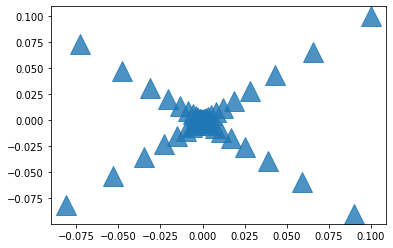

In [2]:
#python3
# import numpy as np 
# import matplotlib.pyplot as plt 
# plt.style.use('dark_background')

def henon_attractor(x, y, a=0.9, b=0.9):
    '''Computes the next step in the Henon 
    map for arguments x, y with kwargs a and
    b as constants.
    '''
    x_next = a*y
    y_next = -b*x 
    return x_next, y_next
    
# number of iterations and array initialization
steps = 10000
X = np.zeros(steps + 1)
Y = np.zeros(steps + 1)

# starting point
X[0], Y[0] = 0.1, 0.1

# add points to array
for i in range(steps):
    x_next, y_next = henon_attractor(X[i], Y[i])
    X[i+1] = x_next 
    Y[i+1] = y_next

# plot figure
plt.plot(X, Y, '^', alpha = 0.8, markersize=20)
# plt.axis('off')
plt.show()
plt.close()

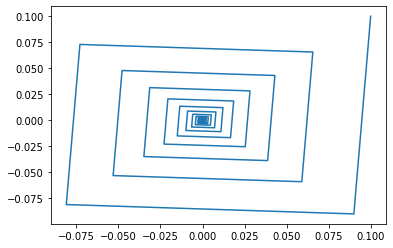

In [3]:
plt.plot(X,Y)

## Correlation dimension 

Since we have a dumped oscillator (a fixed point attractor), we should get a correlation dimension equal to zero.

In [4]:
sd_x= np.std(X, ddof=1)
rvals_vect = nolds.logarithmic_r(0.01 * sd_x, 1.0* sd_x, 1.03)
dim_corr,set_cr = nolds.corr_dim(X,emb_dim=3, rvals=rvals_vect, debug_data=True)

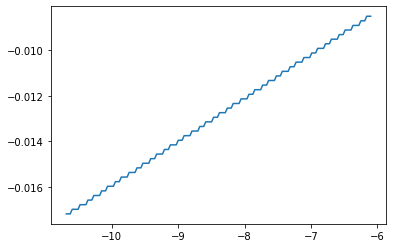

In [5]:
plt.plot(set_cr[0],set_cr[1])

In [6]:
print(dim_corr)

0.0019105025673481625


## Lyapunov Exponents

Since we removed the nonlinear part, we should have all negative Lyapunov exponents.

In [7]:
nolds.lyap_r(X, emb_dim=2)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 2500
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


-0.05267861014918263

In [8]:
nolds.lyap_e(X, emb_dim=2, matrix_dim=2)

array([-0.10573248, -0.8811505 ], dtype=float32)

## Sample Entropy

The sample Entropy should be null.

In [9]:
sd_x       = np.std(X, ddof=1)
nolds.sampen(X, emb_dim=2, tolerance= 0.2*sd_x)

-0.0